In [1]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=521006 sha256=93256b4bbb181e7cfadca049652bdce108c861b59822db7be4a5a4c955bf0120
  Stored in directory: c:\users\skand\appdata\local\pip\cache\wheels\cd\a1\12\db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [2]:
!pip install yfinance

In [3]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
df = yf.download("BTC-USD", start="2015-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
...,...,...,...,...,...,...
2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,36178.140625,57706187875
2021-01-17,36163.648438,36722.351562,34069.320312,35791.277344,35791.277344,52359854336
2021-01-18,35792.238281,37299.285156,34883.843750,36630.074219,36630.074219,49511702429


In [6]:
df =df.reset_index()

In [7]:
df[['ds','y']]=df[['Date','Adj Close']]

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,2014-12-31,320.192993
1,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2015-01-01,314.248993
2,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2015-01-02,315.032013
3,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,2015-01-03,281.082001
4,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015-01-04,264.195007
...,...,...,...,...,...,...,...,...,...
2208,2021-01-16,36821.648438,37864.367188,35633.554688,36178.140625,36178.140625,57706187875,2021-01-16,36178.140625
2209,2021-01-17,36163.648438,36722.351562,34069.320312,35791.277344,35791.277344,52359854336,2021-01-17,35791.277344
2210,2021-01-18,35792.238281,37299.285156,34883.843750,36630.074219,36630.074219,49511702429,2021-01-18,36630.074219
2211,2021-01-19,36642.234375,37755.890625,36069.804688,36069.804688,36069.804688,57244195486,2021-01-19,36069.804688


In [9]:
model=Prophet()

In [10]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future=model.make_future_dataframe(365)

In [13]:
forecast=model.predict(future)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-31,82.817991,229.537313,5816.779082,82.817991,82.817991,3030.951839,3030.951839,3030.951839,19.056079,19.056079,19.056079,3011.895760,3011.895760,3011.895760,0.0,0.0,0.0,3113.769830
1,2015-01-01,84.435987,315.644649,5926.443321,84.435987,84.435987,3085.742358,3085.742358,3085.742358,-20.633072,-20.633072,-20.633072,3106.375430,3106.375430,3106.375430,0.0,0.0,0.0,3170.178345
2,2015-01-02,86.053983,539.730595,6391.220186,86.053983,86.053983,3182.611224,3182.611224,3182.611224,-10.809357,-10.809357,-10.809357,3193.420581,3193.420581,3193.420581,0.0,0.0,0.0,3268.665207
3,2015-01-03,87.671979,405.204105,6213.297252,87.671979,87.671979,3285.482933,3285.482933,3285.482933,14.318807,14.318807,14.318807,3271.164126,3271.164126,3271.164126,0.0,0.0,0.0,3373.154912
4,2015-01-04,89.289975,617.323685,6260.245212,89.289975,89.289975,3328.442828,3328.442828,3328.442828,-9.331166,-9.331166,-9.331166,3337.773995,3337.773995,3337.773995,0.0,0.0,0.0,3417.732803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,2022-01-16,28530.060121,23256.885630,38911.246205,20724.575183,35759.247441,2775.835389,2775.835389,2775.835389,-9.331166,-9.331166,-9.331166,2785.166556,2785.166556,2785.166556,0.0,0.0,0.0,31305.895510
2574,2022-01-17,28558.319789,23007.468561,39077.833917,20718.025931,35818.047181,2629.040733,2629.040733,2629.040733,7.337298,7.337298,7.337298,2621.703435,2621.703435,2621.703435,0.0,0.0,0.0,31187.360522
2575,2022-01-18,28586.579457,22976.636032,38785.838301,20711.587107,35876.846922,2444.995934,2444.995934,2444.995934,0.061411,0.061411,0.061411,2444.934523,2444.934523,2444.934523,0.0,0.0,0.0,31031.575392
2576,2022-01-19,28614.839126,22218.234373,39156.817288,20705.950905,35935.646662,2275.982899,2275.982899,2275.982899,19.056079,19.056079,19.056079,2256.926820,2256.926820,2256.926820,0.0,0.0,0.0,30890.822025


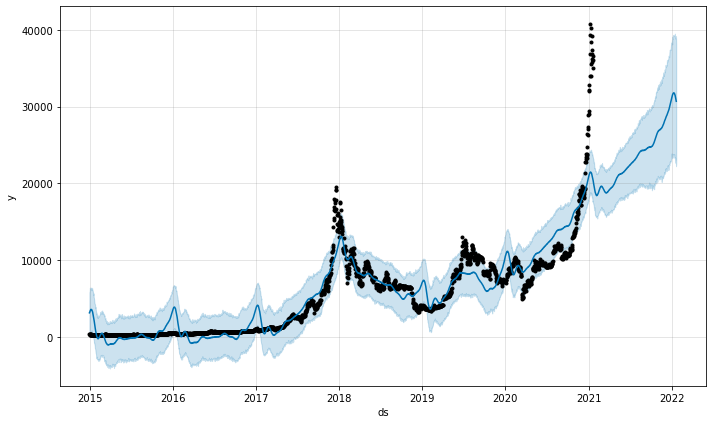

In [17]:
model.plot(forecast)
plt.show()

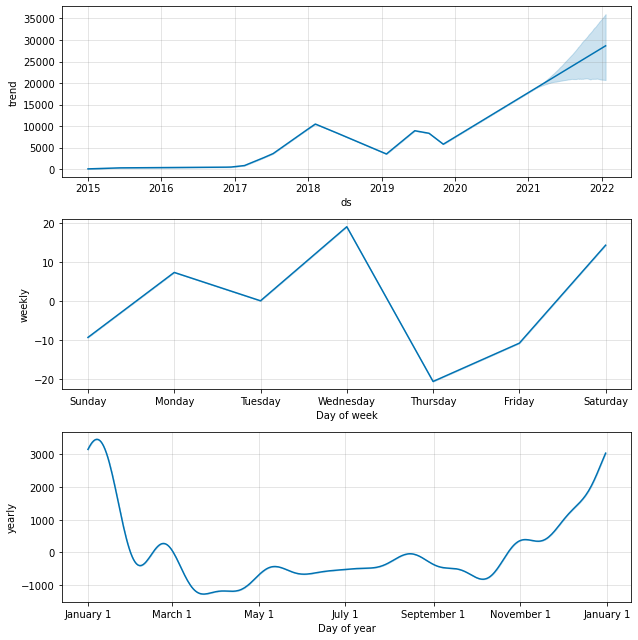

In [18]:
model.plot_components(forecast)
plt.show()